# Setup PiCamera access via cv2

Your system should be able to access the PiCamera OV5467 via cv2. Run the following code to test whether it is properly setup. If the following code returns an error, follow the procedure below to fix the PiCamera access.

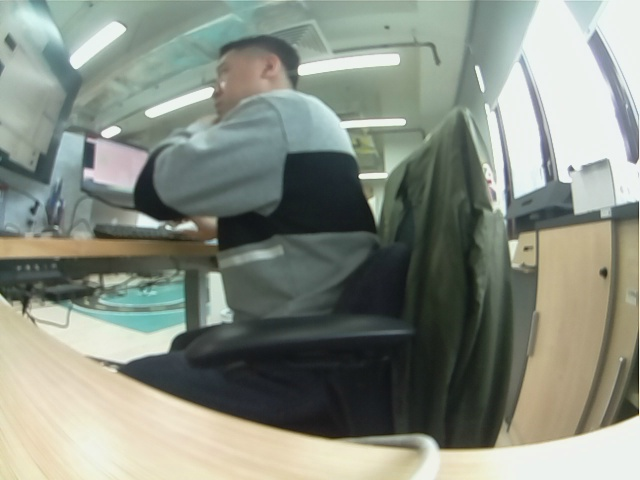

In [9]:
import cv2
from IPython.display import display, Image

# Start the camera
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

# Capture a single frame
ret, frame = cap.read()

# Save the captured image
if ret:
    flipped_frame = cv2.flip(frame, 0)    
    display(Image(data=cv2.imencode('.jpeg', flipped_frame)[1].tobytes()))
else:
    print("Cannot capture frame")

# Release the camera
cap.release()

## Steps to enable PiCamera access via cv2

1. Install OpenCV
2. Check camera is correctly connected
3. Enable legacy camera access
4. Config /boot/config.txt


In [ ]:
### Install OpenCV

In [ ]:
pip install opencv-python

### Check camera is correctly connected

In [4]:
!vcgencmd get_camera

supported=1 detected=1, libcamera interfaces=0


The command above should return `supported=1 detected=1, libcamera interfaces=0`

In [3]:
!v4l2-ctl --list-devices

bcm2835-codec-decode (platform:bcm2835-codec):
	/dev/video10
	/dev/video11
	/dev/video12
	/dev/video18
	/dev/video31
	/dev/media3

bcm2835-isp (platform:bcm2835-isp):
	/dev/video13
	/dev/video14
	/dev/video15
	/dev/video16
	/dev/video20
	/dev/video21
	/dev/video22
	/dev/video23
	/dev/media0
	/dev/media2

mmal service 16.1 (platform:bcm2835_v4l2-0):
	/dev/video0

rpivid (platform:rpivid):
	/dev/video19
	/dev/media1



The command above should return
```
mmal service 16.1 (platform:bcm2835_v4l2-0):
	/dev/video0
```

### 2. Enable legacy camera accesss

#### Enable Camera in `raspi-config`
1. Execute `sudo raspi-config`
2. Navigate to Interface Options > Legacy Camera
3. Enable it.
4. Reboot your Raspberry Pi.

### 3. Config /boot/config.txt

Make sure the line `dtoverlay=vc4-kms-v3d` exists in /boot/config.txt.
1. Run the following command to append this parameter to /boot/config.txt
2. Reboot

In [6]:
!echo "dtoverlay=vc4-kms-v3d" | sudo tee -a /boot/config.txt
!echo "startx=1" | sudo tee -a /boot/config.txt
!echo "gpu_mem=128" | sudo tee -a /boot/config.txt

dtoverlay=vc4-kms-v3d


By setting camera_auto_detect to 0:
1. libcamera-hello won't work
2. cv2 in python will work

In [4]:
!echo "camera_auto_detect=0" | sudo tee -a /boot/config.txt

camera_auto_detect=0


In [ ]:
# Reboot
!sudo reboot

In [1]:
!cat /boot/config.txt

# For more options and information see
# http://rpf.io/configtxt
# Some settings may impact device functionality. See link above for details

# uncomment if you get no picture on HDMI for a default "safe" mode
#hdmi_safe=1

# uncomment the following to adjust overscan. Use positive numbers if console
# goes off screen, and negative if there is too much border
#overscan_left=16
#overscan_right=16
#overscan_top=16
#overscan_bottom=16

# uncomment to force a console size. By default it will be display's size minus
# overscan.
#framebuffer_width=1280
#framebuffer_height=720

# uncomment if hdmi display is not detected and composite is being output
#hdmi_force_hotplug=1

# uncomment to force a specific HDMI mode (this will force VGA)
#hdmi_group=1
#hdmi_mode=1

# uncomment to force a HDMI mode rather than DVI. This can make audio work in
# DMT (computer monitor) modes
#hdmi_drive=2

# uncomment to increase signal to HDMI, if you have interference, blanking, or
# no display
#config_hdmi_boos